In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import streamlit as st
import pickle
import warnings
warnings.filterwarnings('ignore')

**1. Data Exploration**

In [3]:
#Loading the Dataset
df_train = pd.read_csv('/content/Titanic_train.csv')
df_test = pd.read_csv('/content/Titanic_test.csv')

In [4]:
#EDA
print("Training Data Head:\n", df_train.head())
print("\nTraining Data Info:\n")
df_train.info()
print("\nMissing Values:\n", df_train.isnull().sum())

Training Data Head:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

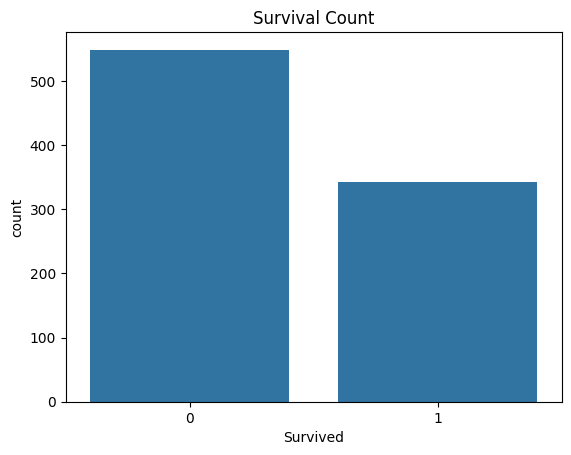

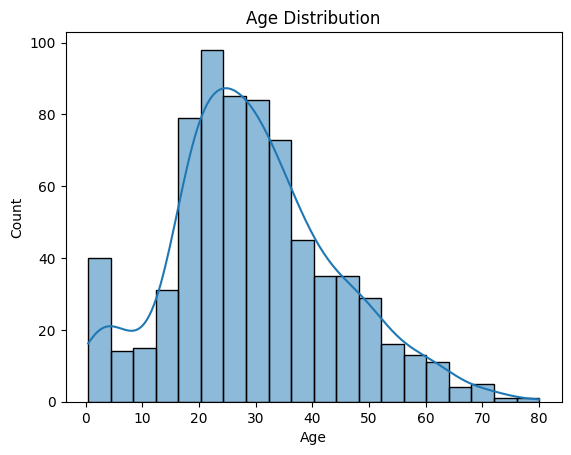

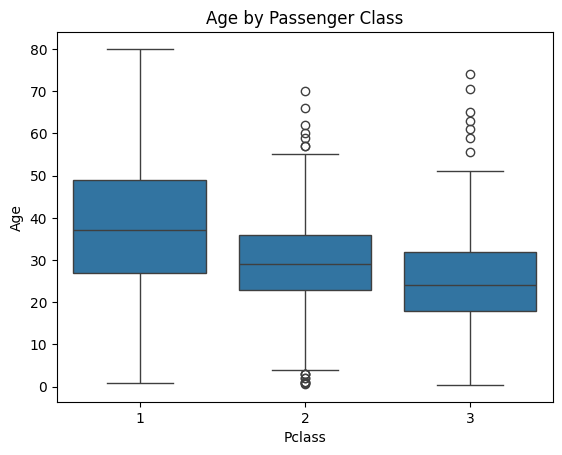

In [5]:
#Visualization
sns.countplot(data=df_train, x='Survived')
plt.title('Survival Count')
plt.show()

sns.histplot(x='Age', data=df_train, kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Pclass', y='Age', data=df_train)
plt.title('Age by Passenger Class')
plt.show()

**2. Data Preprocessing**

In [6]:
#Handling Missing Values
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [7]:
#Drop 'Cabin' due to too many missing values
df_train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [8]:
#Encoding
le_sex = LabelEncoder()
df_train['Sex'] = le_sex.fit_transform(df_train['Sex'])
le_embarked = LabelEncoder()
df_train['Embarked'] = le_embarked.fit_transform(df_train['Embarked'])

In [9]:
#Features and Target
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [10]:
#split train validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Model Building**

In [11]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [12]:
#Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

**4. Model Evaluation**

In [13]:
#Performance Evaluation
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:",  recall_score(y_val, y_pred))
print("F1-Score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-Score: 0.7638888888888888
ROC-AUC: 0.8823680823680824


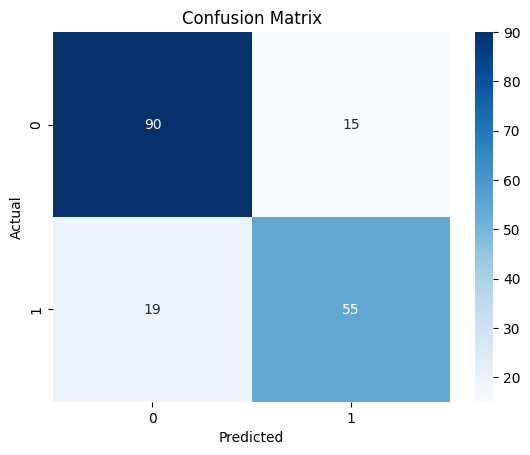

In [14]:
#Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

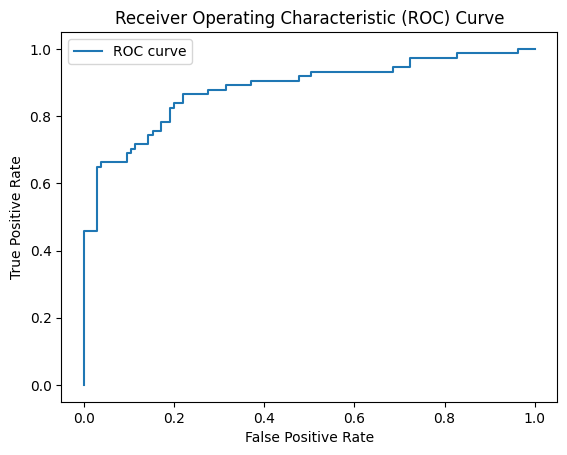

In [15]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label='ROC curve' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**5. Interpretation**

In [16]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

    Feature  Coefficient
5      Fare     0.002534
2       Age    -0.030433
4     Parch    -0.111853
6  Embarked    -0.218777
3     SibSp    -0.293905
0    Pclass    -0.930680
1       Sex    -2.596994


In [17]:
import pickle
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

**Interview Questions:**

1.  What is the difference between precision and recall?

**Answer:**
Precision measures how many of the predicted positive results are actually correct.

Precision = True Positive / True Positive + False Positive

Recall measures how many of the actual positive cases were correctly identified.

Recall = True Positive / True Positive + False Negative

2.  What is cross-validation, and why is it important in binary classification?

**Answer:** Cross-validation is a technique used to evaluate how well a machine learning model generalizes to unseen data. It works by splitting the dataset into multiple parts (called "folds"), training the model on some folds, and testing it on the remaining ones.  
Important in Binary Classification

*   Prevents Overfitting
*   Gives a more Reliable Acuuracy Estimate
*   Helps in model selection and tuning






In [19]:
from google.colab import files
files.download('logistic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>